<h1 style="text-align: center; font-size: 38px"> Classification with regularization </h1>  <br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


In [3]:
path = r"D:\filetraning\data4.txt"

data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

print('data = ')
print(data.head(10))
print('*'*30)
print('data.describe = ')
print(data.describe())

data = 
     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
******************************
data.describe = 
           Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000


In [4]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

print('*'*30)
print('positive data')
print(positive.head(10))
print('*'*30)
print('negative data')
print(negative.head(10))
print('*'*30)

******************************
positive data
     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
******************************
negative data
     Test 1    Test 2  Accepted
58  0.18376  0.933480         0
59  0.22408  0.779970         0
60  0.29896  0.619150         0
61  0.50634  0.758040         0
62  0.61578  0.728800         0
63  0.60426  0.597220         0
64  0.76555  0.502190         0
65  0.92684  0.363300         0
66  0.82316  0.275580         0
67  0.96141  0.085526         0
******************************


Text(0, 0.5, 'Test 2 Score')

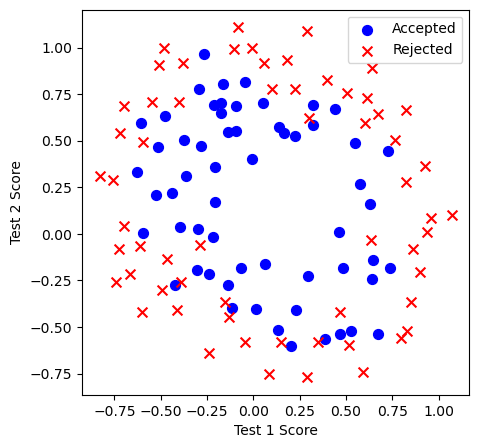

In [6]:
fig,ax = plt.subplots(figsize=(5,5))

ax.scatter(positive['Test 1'],positive['Test 2'],
          s = 50, c = 'b', marker = 'o', label = 'Accepted')

ax.scatter(negative['Test 1'],negative['Test 2'],
          s = 50, c = 'r', marker = 'x', label = 'Rejected')

ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [12]:
degree = 5
x1 = data['Test 1']
x2 = data['Test 2']%%!

print('x1 \n', x1)
print('*'*30)
print('x2 \n', x2)
print('*'*30)

x1 
 0      0.051267
1     -0.092742
2     -0.213710
3     -0.375000
4     -0.513250
         ...   
113   -0.720620
114   -0.593890
115   -0.484450
116   -0.006336
117    0.632650
Name: Test 1, Length: 118, dtype: float64
******************************
x2 
 0      0.699560
1      0.684940
2      0.692250
3      0.502190
4      0.465640
         ...   
113    0.538740
114    0.494880
115    0.999270
116    0.999270
117   -0.030612
Name: Test 2, Length: 118, dtype: float64
******************************


In [11]:
data.insert(3, 'Ones', 1)
print('data \n', data.head(10))
print('*'*30)

ValueError: cannot insert Ones, already exists

In [13]:
print('data \n', data.head(10))
print('*'*30)

data 
      Test 1    Test 2  Accepted  Ones
0  0.051267  0.699560         1     1
1 -0.092742  0.684940         1     1
2 -0.213710  0.692250         1     1
3 -0.375000  0.502190         1     1
4 -0.513250  0.465640         1     1
5 -0.524770  0.209800         1     1
6 -0.398040  0.034357         1     1
7 -0.305880 -0.192250         1     1
8  0.016705 -0.404240         1     1
9  0.131910 -0.513890         1     1
******************************


In [14]:
for i in range(1, degree):
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

In [15]:
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

print('data \n', data.head(10))

data 
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def costReg(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))

    return np.sum(first - second) / (len(X)) + reg

In [25]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X))+((learningRate/len(X))*theta[:,i])
        

    return grad

In [22]:
cols = data.shape[1]
print('cols = ', cols)
print('*'*30)

X2 = data.iloc[:, 1:cols]
print('X2 = ')
print(X2.head(10))
print('*'*30)

y2 = data.iloc[:, 0:1]
print('y2 = ')
print(y2.head(10))
print('*'*30)


cols =  12
******************************
X2 = 
   Ones       F10       F20       F21       F30       F31       F32  \
0     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.397855e-05 -0.000546  0.004035 -0.029801  
2  2.085928e-03 -0.006757 

In [23]:
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

print('theta 2 = ', theta2)
print('*'*30)

theta 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
******************************


In [24]:
learningRate = 1

rcost = costReg(theta2, X2, y2, learningRate)
print()
print('regularized cost = ', rcost)
print()


regularized cost =  0.6931471805599454



In [28]:
result = opt.fmin_tnc(func=costReg, x0=theta2,
                     fprime=gradientReg, args=(X2, y2, learningRate))

print("*"*30)
print('result = ', result)

******************************
result =  (array([ 1.22702480e-04,  7.19893533e-05, -3.74156020e-04, -1.44256518e-04,
        2.93168594e-05, -5.64160697e-05, -1.02826715e-04, -2.83150640e-04,
        6.47460472e-07, -1.99697745e-04, -1.68479401e-05]), 97, 1)


C:\Users\15-6-2023\AppData\Local\Temp\ipykernel_17464\3466878701.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i] = (np.sum(term) / len(X))+((learningRate/len(X))*theta[:,i])


In [31]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)

correct = [1 if ((a == 1 and b == 1) or
                (a == 0 and b == 0)) else 0
                for (a,b) in zip(predictions, y2)]

accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 77%
